# Grouping Similar Medical Schools Using Hierarchical Clustering in Scikit-learn and SciPy
### Computer Science Capstone — C964 Task 2
Daniel Gallegos

Summary: This notebook uses Scikit-learn to preprocess and vectorize medical school mission statements using TfidfVectorizer. Then, it applies hierarchical clustering using SciPy to group similar schools based on their textual descriptions.

### Step 1: Import self-collected dataset from my GitHub repository

In [1]:
import pandas as pd
med_data = pd.read_csv('https://raw.githubusercontent.com/danielegos/usmedschoolmap/refs/heads/main/data.csv')

In [2]:
med_data

,School,City,State,Latitude,Longitude,MD-PhD Program,MD-PhD_link,#1 Specialty (2025 Match),#2 Specialty (2025 Match),#3 Specialty (2025 Match),image_url,Description,Website,LCME Accreditation Status,Initial Year of LCME Accreditation
0,Albany Medical College,Albany,New York,42.653400,-73.777800,Yes,https://www.amc.edu/education/md-program/about...,Internal Medicine,Anesthesiology,Pediatrics,https://thecustodianus.com/wp-content/uploads/...,"We take pride in offering an intimate, collegi...",https://www.amc.edu/,Full,On or prior to 1942*
1,Albert Einstein College of Medicine,Bronx,New York,40.850500,-73.845900,Yes,https://einsteinmed.edu/education/mstp/,Internal Medicine,Medicine,Anesthesiology,https://montefioreeinsteinnow.org/sites/defaul...,"For more than 70 years, our faculty and staff ...",https://einsteinmed.edu/,"Full, on probation",1955
2,Alice L. Walton School of Medicine,Bentonville,Arkansas,36.380812,-94.197410,No,NaN,Not available,Not available,Not available,https://www.alwmedschool.org/app/uploads/2024/...,Alice L. Walton School of Medicine (AWSOM) is ...,https://www.alwmedschool.org/,Preliminary,2024
3,Anne Burnett Marion School of Medicine at TCU,Fort Worth,Texas,32.710900,-97.365700,Yes,https://mdschool.tcu.edu/graduate-mdphdbioengr/,Internal Medicine,Emergency Medicine,Obstetrics-Gynecology,https://www.linbeck.com/wp-content/uploads/202...,Our Mission is to transform health care by ins...,https://mdschool.tcu.edu/,Full,2018
4,Baylor College of Medicine,Houston,Texas,29.710500,-95.396200,Yes,https://www.bcm.edu/education/education-progra...,Internal Medicine,Anesthesiology,Pediatrics,https://cdn.bcm.edu/sites/default/files/styles...,Baylor College of Medicine is a health science...,https://www.bcm.edu/,Full,On or prior to 1942*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Weill Cornell Medicine,New York,New York,40.750773,-74.014070,Yes,https://mdphd.weill.cornell.edu/,Not available,Not available,Not available,https://mededits.com/wp-content/uploads/2020/0...,Weill Cornell Medicine is committed to excelle...,https://weill.cornell.edu/,Full,On or prior to 1942*
156,West Virginia University School of Medicine,Morgantown,West Virginia,39.654709,-79.960277,Yes,https://health.wvu.edu/research-and-graduate-e...,Internal Medicine,Family Medicine,General Surgery,https://medicine.hsc.wvu.edu/media/104132/hsc-...,With a required rural health experience includ...,https://medicine.wvu.edu/,Full,On or prior to 1942*
157,Western Michigan University Homer Stryker M.D....,Kalamazoo,Michigan,42.286259,-85.594553,Yes,https://wmed.edu/node/267,Not available,Not available,Not available,https://media.licdn.com/dms/image/v2/C561BAQHm...,"The Homer Stryker M.D. School of Medicine, loc...",https://www.med.wmich.edu/,Full,2012
158,Wright State University Boonshoft School of Me...,Dayton,Ohio,39.780228,-84.064235,Yes,https://medicine.wright.edu/md-program/combine...,Family Medicine,Internal Medicine,Pediatrics,https://medicine.wright.edu/sites/medicine.wri...,Wright State University Boonshoft School of Me...,https://medicine.wright.edu/,Full,1976


### Step 2: Convert Text to Numerical Features (TF-IDF)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert mission statements to TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(med_data["Description"])

In [4]:
print(X) # Verify the output of the vectorization

  (0, 2126)	0.2482886976295357
  (0, 1919)	0.23395372117327878
  (0, 1539)	0.2684927121829223
  (0, 605)	0.2482886976295357
  (0, 1031)	0.13699051475945273
  (0, 1197)	0.21374970661989218
  (0, 1391)	0.2482886976295357
  (0, 2839)	0.13524194127683556
  (0, 1247)	0.2684927121829223
  (0, 1322)	0.23395372117327878
  (0, 1649)	0.12587144318438648
  (0, 1714)	0.23395372117327878
  (0, 2073)	0.19941473016363528
  (0, 1674)	0.2684927121829223
  (0, 1017)	0.2482886976295357
  (0, 2470)	0.22283464959821253
  (0, 1300)	0.1835464256179757
  (0, 492)	0.2684927121829223
  (0, 2412)	0.2684927121829223
  (0, 2582)	0.08405968094044537
  (1, 137)	0.15879065155441946
  (1, 2927)	0.09252341177892942
  (1, 1130)	0.06126653536025577
  (1, 2532)	0.09996820455048008
  (1, 2431)	0.13670157162925609
  :	:
  (159, 861)	0.13306265242219054
  (159, 929)	0.20785535338313443
  (159, 1642)	0.12554699170942507
  (159, 2393)	0.11901035122121252
  (159, 2390)	0.07079685023760122
  (159, 1757)	0.12202138214760751
  (15

### Step 3: Perform Hierarchical Clustering on the Data

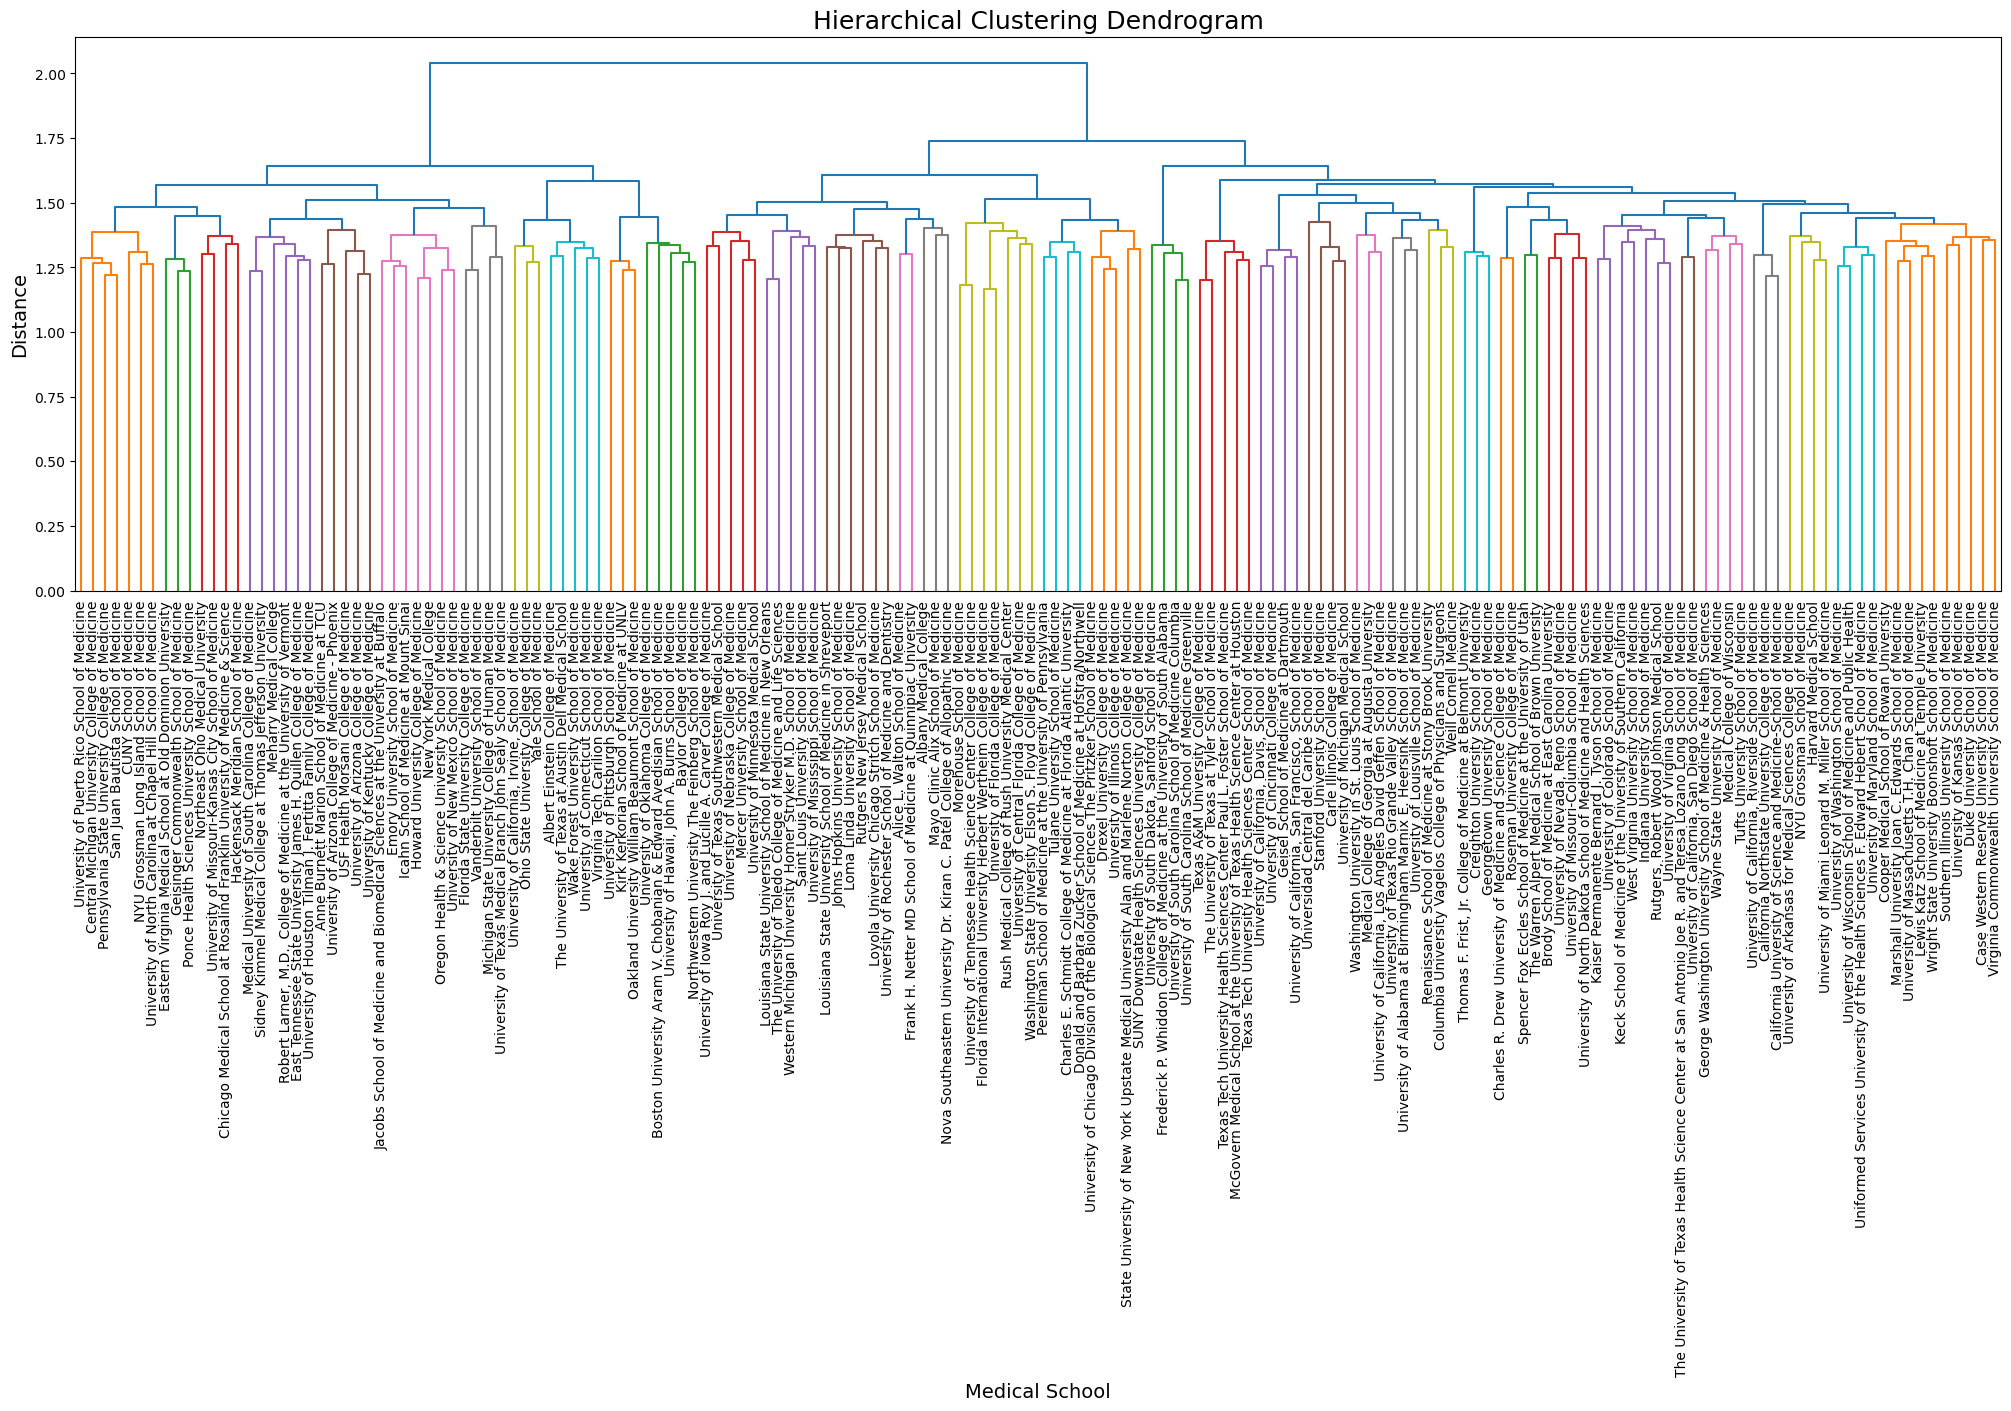

In [5]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import linkage, dendrogram

# Prepare TF-IDF matrix
mission_texts = med_data["Description"].tolist()
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(mission_texts).toarray()

# Hierarchical clustering
Z = linkage(X, method='ward')

# Plot dendrogram with large figure and fonts
plt.figure(figsize=(20, 14), constrained_layout=True)

dendrogram(
    Z,
    labels=med_data["School"].tolist(),
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title("Hierarchical Clustering Dendrogram", fontsize=18)
plt.xlabel("Medical School", fontsize=14)
plt.ylabel("Distance", fontsize=14)

# plt.savefig("dendrogram.png", dpi=300)
plt.show()

# plt.close()

### Step 4: Assign Cluster Labels and Add to DataFrame


In [6]:
from scipy.cluster.hierarchy import fcluster

# Set number of clusters equal to the number of clusters in the dendrogram (37)
num_clusters = 37

# Extract cluster labels
labels = fcluster(Z, t=num_clusters, criterion="maxclust")

# Add to your DataFrame
med_data["hierarchical_cluster"] = labels

In [7]:
med_data

,School,City,State,Latitude,Longitude,MD-PhD Program,MD-PhD_link,#1 Specialty (2025 Match),#2 Specialty (2025 Match),#3 Specialty (2025 Match),image_url,Description,Website,LCME Accreditation Status,Initial Year of LCME Accreditation,hierarchical_cluster
0,Albany Medical College,Albany,New York,42.653400,-73.777800,Yes,https://www.amc.edu/education/md-program/about...,Internal Medicine,Anesthesiology,Pediatrics,https://thecustodianus.com/wp-content/uploads/...,"We take pride in offering an intimate, collegi...",https://www.amc.edu/,Full,On or prior to 1942*,16
1,Albert Einstein College of Medicine,Bronx,New York,40.850500,-73.845900,Yes,https://einsteinmed.edu/education/mstp/,Internal Medicine,Medicine,Anesthesiology,https://montefioreeinsteinnow.org/sites/defaul...,"For more than 70 years, our faculty and staff ...",https://einsteinmed.edu/,"Full, on probation",1955,9
2,Alice L. Walton School of Medicine,Bentonville,Arkansas,36.380812,-94.197410,No,NaN,Not available,Not available,Not available,https://www.alwmedschool.org/app/uploads/2024/...,Alice L. Walton School of Medicine (AWSOM) is ...,https://www.alwmedschool.org/,Preliminary,2024,15
3,Anne Burnett Marion School of Medicine at TCU,Fort Worth,Texas,32.710900,-97.365700,Yes,https://mdschool.tcu.edu/graduate-mdphdbioengr/,Internal Medicine,Emergency Medicine,Obstetrics-Gynecology,https://www.linbeck.com/wp-content/uploads/202...,Our Mission is to transform health care by ins...,https://mdschool.tcu.edu/,Full,2018,5
4,Baylor College of Medicine,Houston,Texas,29.710500,-95.396200,Yes,https://www.bcm.edu/education/education-progra...,Internal Medicine,Anesthesiology,Pediatrics,https://cdn.bcm.edu/sites/default/files/styles...,Baylor College of Medicine is a health science...,https://www.bcm.edu/,Full,On or prior to 1942*,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Weill Cornell Medicine,New York,New York,40.750773,-74.014070,Yes,https://mdphd.weill.cornell.edu/,Not available,Not available,Not available,https://mededits.com/wp-content/uploads/2020/0...,Weill Cornell Medicine is committed to excelle...,https://weill.cornell.edu/,Full,On or prior to 1942*,26
156,West Virginia University School of Medicine,Morgantown,West Virginia,39.654709,-79.960277,Yes,https://health.wvu.edu/research-and-graduate-e...,Internal Medicine,Family Medicine,General Surgery,https://medicine.hsc.wvu.edu/media/104132/hsc-...,With a required rural health experience includ...,https://medicine.wvu.edu/,Full,On or prior to 1942*,31
157,Western Michigan University Homer Stryker M.D....,Kalamazoo,Michigan,42.286259,-85.594553,Yes,https://wmed.edu/node/267,Not available,Not available,Not available,https://media.licdn.com/dms/image/v2/C561BAQHm...,"The Homer Stryker M.D. School of Medicine, loc...",https://www.med.wmich.edu/,Full,2012,13
158,Wright State University Boonshoft School of Me...,Dayton,Ohio,39.780228,-84.064235,Yes,https://medicine.wright.edu/md-program/combine...,Family Medicine,Internal Medicine,Pediatrics,https://medicine.wright.edu/sites/medicine.wri...,Wright State University Boonshoft School of Me...,https://medicine.wright.edu/,Full,1976,37


### Step 5: Get TF-IDF matrix & feature names

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(med_data["Description"])
terms = vectorizer.get_feature_names_out()

### Step 6: Calculate top keywords per cluster

In [9]:
import numpy as np
import pandas as pd

def get_top_terms_per_cluster(X, labels, terms, top_n=5):
    df_tfidf = pd.DataFrame(X.toarray())
    df_tfidf['cluster'] = labels

    top_terms = {}
    for cluster in np.unique(labels):
        cluster_tfidf = df_tfidf[df_tfidf['cluster'] == cluster].drop(columns='cluster')
        # Average TF-IDF score for each term in the cluster
        mean_tfidf = cluster_tfidf.mean(axis=0)
        # Get indices of top terms
        top_indices = mean_tfidf.sort_values(ascending=False).head(top_n).index
        top_terms[cluster] = [terms[i] for i in top_indices]

    return top_terms

top_keywords = get_top_terms_per_cluster(X, med_data["hierarchical_cluster"], terms)

for cluster, keywords in top_keywords.items():
    print(f"Cluster {cluster} top keywords: {keywords}")

Cluster 1 top keywords: ['health', 'services', 'care', 'research', 'education']
Cluster 2 top keywords: ['healthcare', 'sciences', 'global', 'professionals', 'dedicated']
Cluster 3 top keywords: ['community', 'levels', 'health', 'rfu', 'development']
Cluster 4 top keywords: ['college', 'care', 'health', 'meharry', 'medical']
Cluster 5 top keywords: ['health', 'care', 'college', 'arizona', 'education']
Cluster 6 top keywords: ['health', 'new', 'care', 'professionals', 'scientists']
Cluster 7 top keywords: ['knowledge', 'centered', 'need', '21st', 'exemplary']
Cluster 8 top keywords: ['inclusive', 'discovery', 'curiosity', 'uci', 'orange']
Cluster 9 top keywords: ['cutting', 'edge', 'uconn', 'innovation', 'health']
Cluster 10 top keywords: ['inclusion', 'diversity', 'collaboration', 'humility', 'communities']
Cluster 11 top keywords: ['social', 'integrity', 'respect', 'values', 'knowledge']
Cluster 12 top keywords: ['medical', 'kearney', 'southwestern', 'campus', 'rural']
Cluster 13 top 

### Step 7: Add cluster summary column to DataFrame

In [10]:
def keywords_summary(row):
    return ", ".join(top_keywords[row["hierarchical_cluster"]])

med_data["cluster_summary"] = med_data.apply(keywords_summary, axis=1)

In [11]:
med_data

,School,City,State,Latitude,Longitude,MD-PhD Program,MD-PhD_link,#1 Specialty (2025 Match),#2 Specialty (2025 Match),#3 Specialty (2025 Match),image_url,Description,Website,LCME Accreditation Status,Initial Year of LCME Accreditation,hierarchical_cluster,cluster_summary
0,Albany Medical College,Albany,New York,42.653400,-73.777800,Yes,https://www.amc.edu/education/md-program/about...,Internal Medicine,Anesthesiology,Pediatrics,https://thecustodianus.com/wp-content/uploads/...,"We take pride in offering an intimate, collegi...",https://www.amc.edu/,Full,On or prior to 1942*,16,"mayo, nsu, small, dr, clinic"
1,Albert Einstein College of Medicine,Bronx,New York,40.850500,-73.845900,Yes,https://einsteinmed.edu/education/mstp/,Internal Medicine,Medicine,Anesthesiology,https://montefioreeinsteinnow.org/sites/defaul...,"For more than 70 years, our faculty and staff ...",https://einsteinmed.edu/,"Full, on probation",1955,9,"cutting, edge, uconn, innovation, health"
2,Alice L. Walton School of Medicine,Bentonville,Arkansas,36.380812,-94.197410,No,NaN,Not available,Not available,Not available,https://www.alwmedschool.org/app/uploads/2024/...,Alice L. Walton School of Medicine (AWSOM) is ...,https://www.alwmedschool.org/,Preliminary,2024,15,"lcme, self, md, accreditation, committee"
3,Anne Burnett Marion School of Medicine at TCU,Fort Worth,Texas,32.710900,-97.365700,Yes,https://mdschool.tcu.edu/graduate-mdphdbioengr/,Internal Medicine,Emergency Medicine,Obstetrics-Gynecology,https://www.linbeck.com/wp-content/uploads/202...,Our Mission is to transform health care by ins...,https://mdschool.tcu.edu/,Full,2018,5,"health, care, college, arizona, education"
4,Baylor College of Medicine,Houston,Texas,29.710500,-95.396200,Yes,https://www.bcm.edu/education/education-progra...,Internal Medicine,Anesthesiology,Pediatrics,https://cdn.bcm.edu/sites/default/files/styles...,Baylor College of Medicine is a health science...,https://www.bcm.edu/,Full,On or prior to 1942*,11,"social, integrity, respect, values, knowledge"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Weill Cornell Medicine,New York,New York,40.750773,-74.014070,Yes,https://mdphd.weill.cornell.edu/,Not available,Not available,Not available,https://mededits.com/wp-content/uploads/2020/0...,Weill Cornell Medicine is committed to excelle...,https://weill.cornell.edu/,Full,On or prior to 1942*,26,"vp, stony, brook, cornell, presbyterian"
156,West Virginia University School of Medicine,Morgantown,West Virginia,39.654709,-79.960277,Yes,https://health.wvu.edu/research-and-graduate-e...,Internal Medicine,Family Medicine,General Surgery,https://medicine.hsc.wvu.edu/media/104132/hsc-...,With a required rural health experience includ...,https://medicine.wvu.edu/,Full,On or prior to 1942*,31,"health, transforming, school, indiana, medicine"
157,Western Michigan University Homer Stryker M.D....,Kalamazoo,Michigan,42.286259,-85.594553,Yes,https://wmed.edu/node/267,Not available,Not available,Not available,https://media.licdn.com/dms/image/v2/C561BAQHm...,"The Homer Stryker M.D. School of Medicine, loc...",https://www.med.wmich.edu/,Full,2012,13,"center, simulation, ummc, campus, health"
158,Wright State University Boonshoft School of Me...,Dayton,Ohio,39.780228,-84.064235,Yes,https://medicine.wright.edu/md-program/combine...,Family Medicine,Internal Medicine,Pediatrics,https://medicine.wright.edu/sites/medicine.wri...,Wright State University Boonshoft School of Me...,https://medicine.wright.edu/,Full,1976,37,"school, medical, university, duke, health"


### Step 8: Save Dataframe as .csv

In [12]:
# NOTE: Not applicable for Binder version
# med_data.to_csv("clustered_schools.csv", index=False)